# Using MLJ with Flux to train the iris dataset

In [1]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using MLJ
using Flux
import RDatasets

using Random
Random.seed!(123)

MLJ.color_off()

using Plots
pyplot(size=(600, 300*(sqrt(5)-1)));

 Activating environment at `~/Dropbox/Julia7/MLJ/MLJFlux/examples/iris/Project.toml`


Following is a very basic introductory example, using a default
builder and no standardization of input features.

For a more advanced illustration, see the [MNIST images
example](https://github.com/FluxML/MLJFlux.jl/blob/dev/examples/mnist).

## Loading some data and instantiating a model

In [2]:
iris = RDatasets.dataset("datasets", "iris");
y, X = unpack(iris, ==(:Species), colname -> true, rng=123);
NeuralNetworkClassifier = @load NeuralNetworkClassifier
clf = NeuralNetworkClassifier()

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main.##407 /Users/anthony/.julia/packages/MLJModels/66QJr/src/loading.jl:168
import MLJFlux ✔


NeuralNetworkClassifier(
    builder = Short(
            n_hidden = 0,
            dropout = 0.5,
            σ = NNlib.σ),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.Losses.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false,
    acceleration = CPU1{Nothing}(nothing)) @443

## Incremental training

In [3]:
import Random.seed!; seed!(123)
mach = machine(clf, X, y)
fit!(mach)

training_loss = cross_entropy(predict(mach, X), y) |> mean

┌ Info: Training Machine{NeuralNetworkClassifier{Short,…},…} @158.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/4DmTL/src/machines.jl:341
Optimising neural net:100%[=========================] Time: 0:00:00


0.8993467f0

Increasing learning rate and adding iterations:

In [4]:
clf.optimiser.eta = clf.optimiser.eta * 2
clf.epochs = clf.epochs + 5

fit!(mach, verbosity=2);

┌ Info: Updating Machine{NeuralNetworkClassifier{Short,…},…} @158.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/4DmTL/src/machines.jl:342
┌ Info: Loss is 0.853
└ @ MLJFlux /Users/anthony/.julia/packages/MLJFlux/wj7HX/src/core.jl:122
┌ Info: Loss is 0.8207
└ @ MLJFlux /Users/anthony/.julia/packages/MLJFlux/wj7HX/src/core.jl:122
┌ Info: Loss is 0.8072
└ @ MLJFlux /Users/anthony/.julia/packages/MLJFlux/wj7HX/src/core.jl:122
┌ Info: Loss is 0.752
└ @ MLJFlux /Users/anthony/.julia/packages/MLJFlux/wj7HX/src/core.jl:122
┌ Info: Loss is 0.7077
└ @ MLJFlux /Users/anthony/.julia/packages/MLJFlux/wj7HX/src/core.jl:122


In [5]:
training_loss = cross_entropy(predict(mach, X), y) |> mean

0.7076617f0

## Accessing the Flux chain (model)

In [6]:
chain = fitted_params(mach).chain

Chain(Chain(Dense(4, 3, σ), Dropout(0.5), Dense(3, 3)), softmax)

##  Evolution of out-of-sample performance

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…} @663.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/4DmTL/src/machines.jl:341
┌ Info: Attempting to evaluate 25 models.
└ @ MLJTuning /Users/anthony/.julia/packages/MLJTuning/wBJ80/src/tuned_models.jl:566
Evaluating over 25 metamodels: 100%[=========================] Time: 0:00:04


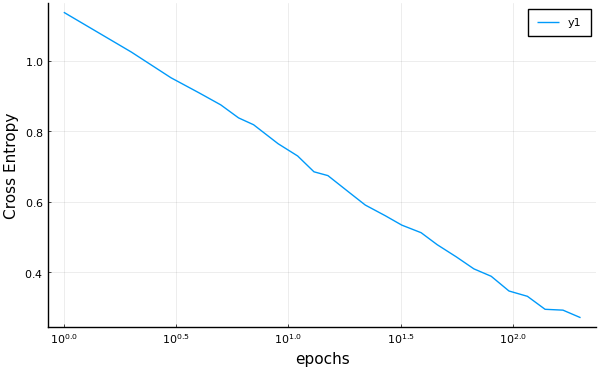

In [7]:
r = range(clf, :epochs, lower=1, upper=200, scale=:log10)
curve = learning_curve(clf, X, y,
                       range=r,
                       resampling=Holdout(fraction_train=0.7),
                       measure=cross_entropy)
using Plots
plot(curve.parameter_values,
       curve.measurements,
       xlab=curve.parameter_name,
       xscale=curve.parameter_scale,
       ylab = "Cross Entropy")

In [8]:
savefig("iris_history.png")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*